<a href="https://colab.research.google.com/github/bhushanbkt/Garbage-Classification/blob/main/Trash_%26_Resued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload the kaggle.json file that you downloaded
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

 95% 78.0M/82.0M [00:00<00:00, 122MB/s]
100% 82.0M/82.0M [00:00<00:00, 110MB/s]


In [6]:
# import zipfile
# import os

# # Specify the path to the downloaded zip file
# zip_file_path = '/content/garbage-classification.zip'

# # Specify the directory to extract the contents
# extracted_path = '/content/drive/MyDrive/Dataset'

# # Extract the contents of the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)

# # List the files in the extracted directory
# os.listdir(extracted_path)

['real_and_fake_face',
 'Brain_Tumor',
 'PoseEstimation',
 'annotations.xml',
 'Fabric_img',
 'variables',
 'assets',
 'saved_model.pb',
 'fingerprint.pb',
 'dataset-ninja',
 'Garbage',
 '.ipynb_checkpoints',
 'Garbage classification',
 'garbage classification',
 'one-indexed-files-notrash_test.txt',
 'one-indexed-files-notrash_train.txt',
 'one-indexed-files-notrash_val.txt',
 'one-indexed-files.txt',
 'zero-indexed-files.txt']

In [7]:
import os
os.listdir('/content/drive/MyDrive/Dataset/Garbage classification/Garbage classification')

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/Dataset/Garbage classification/Garbage classification'

# Function to load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    class_names = os.listdir(dataset_path)
    class_dict = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Adjust the size as needed
            images.append(image)
            labels.append(class_dict[class_name])

    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_data(dataset_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preprocesing the Data:

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [13]:
X_train

array([[[[0.45490196, 0.44705882, 0.43137255],
         [0.40784314, 0.4       , 0.38039216],
         [0.41568627, 0.41176471, 0.38431373],
         ...,
         [0.23137255, 0.32941176, 0.43137255],
         [0.23529412, 0.33333333, 0.43529412],
         [0.23921569, 0.3372549 , 0.43921569]],

        [[0.4627451 , 0.46666667, 0.4627451 ],
         [0.40392157, 0.40784314, 0.4       ],
         [0.35294118, 0.35686275, 0.35294118],
         ...,
         [0.23529412, 0.33333333, 0.43529412],
         [0.23921569, 0.3372549 , 0.43921569],
         [0.23921569, 0.3372549 , 0.43921569]],

        [[0.38431373, 0.40392157, 0.42352941],
         [0.34117647, 0.36862745, 0.38823529],
         [0.36078431, 0.38431373, 0.41568627],
         ...,
         [0.23921569, 0.3372549 , 0.43921569],
         [0.23921569, 0.3372549 , 0.43921569],
         [0.23921569, 0.3372549 , 0.43921569]],

        ...,

        [[0.63137255, 0.79215686, 0.96862745],
         [0.63529412, 0.79607843, 0.97254902]

VGG16

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

In [2]:
# Create the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [3]:
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 21139014 (80.64 MB)
Trainable params: 6424326 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [9]:
# Train the model
model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
64/64 [==============================] - 32s 337ms/step - loss: 1.9361 - accuracy: 0.4320 - val_loss: 0.9603 - val_accuracy: 0.6383
Epoch 2/7
64/64 [==============================] - 10s 159ms/step - loss: 0.9830 - accuracy: 0.6190 - val_loss: 0.8926 - val_accuracy: 0.6640
Epoch 3/7
64/64 [==============================] - 11s 170ms/step - loss: 0.8401 - accuracy: 0.6799 - val_loss: 0.8455 - val_accuracy: 0.6700
Epoch 4/7
64/64 [==============================] - 11s 171ms/step - loss: 0.7595 - accuracy: 0.7219 - val_loss: 0.7867 - val_accuracy: 0.7055
Epoch 5/7
64/64 [==============================] - 10s 161ms/step - loss: 0.6577 - accuracy: 0.7427 - val_loss: 0.7068 - val_accuracy: 0.7253
Epoch 6/7
64/64 [==============================] - 11s 170ms/step - loss: 0.5334 - accuracy: 0.8021 - val_loss: 0.7262 - val_accuracy: 0.7372
Epoch 7/7
64/64 [==============================] - 10s 157ms/step - loss: 0.4887 - accuracy: 0.8263 - val_loss: 0.7394 - val_accuracy: 0.7391


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


16/16 [==============================] - 2s 122ms/step - loss: 0.7394 - accuracy: 0.7391
Test accuracy: 0.739130437374115


ResNet50

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import tensorflow as tf


In [5]:
# Create the ResNet50 model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Create a new model on top of the pre-trained base model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 24113798 (91.99 MB)
Trainable params: 526086 (2.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
64/64 [==============================] - 20s 230ms/step - loss: 1.8232 - accuracy: 0.2345 - val_loss: 1.6613 - val_accuracy: 0.3004
Epoch 2/10
64/64 [==============================] - 9s 140ms/step - loss: 1.6753 - accuracy: 0.2652 - val_loss: 1.6321 - val_accuracy: 0.3458
Epoch 3/10
64/64 [==============================] - 9s 145ms/step - loss: 1.6633 - accuracy: 0.2608 - val_loss: 1.6227 - val_accuracy: 0.3340
Epoch 4/10
64/64 [==============================] - 9s 148ms/step - loss: 1.6503 - accuracy: 0.2964 - val_loss: 1.6151 - val_accuracy: 0.3340
Epoch 5/10
64/64 [==============================] - 9s 138ms/step - loss: 1.6400 - accuracy: 0.2736 - val_loss: 1.6342 - val_accuracy: 0.2530
Epoch 6/10
64/64 [==============================] - 8s 122ms/step - loss: 1.6349 - accuracy: 0.2905 - val_loss: 1.6175 - val_accuracy: 0.3399
Epoch 7/10
64/64 [==============================] - 8s 123ms/step - loss: 1.6282 - accuracy: 0.2914 - val_loss: 1.6093 - val_accuracy: 0.2905
Epoch

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


16/16 [==============================] - 2s 96ms/step - loss: 1.6032 - accuracy: 0.3281
Test accuracy: 0.3280632495880127


VGG19

In [15]:
from tensorflow.keras.applications import VGG19


In [16]:
# Create the VGG19 model (pre-trained on ImageNet)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Create a new model on top of the pre-trained base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 26448710 (100.89 MB)
Trainable params: 6424326 (24.51 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [19]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
64/64 [==============================] - 34s 361ms/step - loss: 2.2884 - accuracy: 0.3835 - val_loss: 1.2841 - val_accuracy: 0.5375
Epoch 2/10
64/64 [==============================] - 13s 197ms/step - loss: 1.2214 - accuracy: 0.5294 - val_loss: 0.9906 - val_accuracy: 0.6186
Epoch 3/10
64/64 [==============================] - 13s 198ms/step - loss: 1.0485 - accuracy: 0.5819 - val_loss: 0.9235 - val_accuracy: 0.6423
Epoch 4/10
64/64 [==============================] - 12s 195ms/step - loss: 1.0158 - accuracy: 0.5943 - val_loss: 0.8884 - val_accuracy: 0.6304
Epoch 5/10
64/64 [==============================] - 12s 190ms/step - loss: 0.9358 - accuracy: 0.6190 - val_loss: 0.8538 - val_accuracy: 0.6462
Epoch 6/10
64/64 [==============================] - 12s 189ms/step - loss: 0.8746 - accuracy: 0.6497 - val_loss: 0.8115 - val_accuracy: 0.6917
Epoch 7/10
64/64 [==============================] - 12s 192ms/step - loss: 0.8240 - accuracy: 0.6616 - val_loss: 0.7899 - val_accuracy: 0.6601

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


16/16 [==============================] - 2s 148ms/step - loss: 0.7196 - accuracy: 0.7332
Test accuracy: 0.7332015633583069


CNN Model:

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))  # 6 classes


In [5]:
# Compile the Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the Model

model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))


Epoch 1/7
64/64 [==============================] - 10s 90ms/step - loss: 6.9363 - accuracy: 0.3236 - val_loss: 1.4271 - val_accuracy: 0.4249
Epoch 2/7
64/64 [==============================] - 2s 37ms/step - loss: 1.1631 - accuracy: 0.5656 - val_loss: 1.3913 - val_accuracy: 0.4704
Epoch 3/7
64/64 [==============================] - 2s 37ms/step - loss: 0.7525 - accuracy: 0.7600 - val_loss: 1.3012 - val_accuracy: 0.5494
Epoch 4/7
64/64 [==============================] - 2s 37ms/step - loss: 0.4022 - accuracy: 0.8951 - val_loss: 1.4625 - val_accuracy: 0.5277
Epoch 5/7
64/64 [==============================] - 2s 37ms/step - loss: 0.2157 - accuracy: 0.9535 - val_loss: 1.6600 - val_accuracy: 0.5316
Epoch 6/7
64/64 [==============================] - 3s 39ms/step - loss: 0.1336 - accuracy: 0.9718 - val_loss: 1.6665 - val_accuracy: 0.5810
Epoch 7/7
64/64 [==============================] - 3s 41ms/step - loss: 0.0766 - accuracy: 0.9832 - val_loss: 1.7470 - val_accuracy: 0.5514


In [7]:
test_loss, test_acc = model.evaluate(X_train, y_train)
print(f'Test accuracy: {test_acc}')


64/64 [==============================] - 1s 15ms/step - loss: 0.0526 - accuracy: 0.9926
Test accuracy: 0.9925779104232788


1/1 [==============================] - 0s 25ms/step


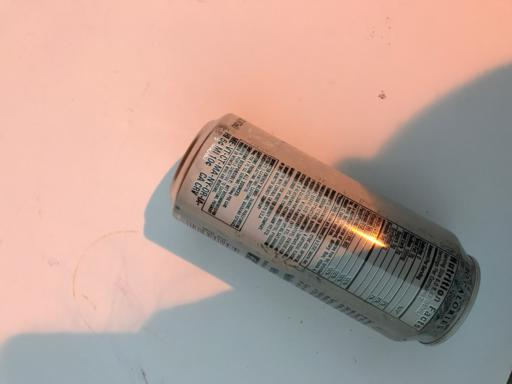

Predicted Class: metal


In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the model
# model = load_model('/path/to/your/model.h5')  # Replace with the actual path to your trained model

# Load the image from file
image_path = '/content/drive/MyDrive/Dataset/Garbage classification/Garbage classification/metal/metal101.jpg'
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))  # Adjust the size as needed
img = img / 255.0  # Normalize the pixel values

# Reshape the image to match the input shape expected by the model
img = np.reshape(img, (1, 224, 224, 3))

# Make the prediction
predictions = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Define your class labels
class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Get the class name for the predicted index
predicted_class_name = class_labels[predicted_class_index]

# Display the image along with the predicted class name
cv2_imshow(cv2.imread(image_path))
print(f'Predicted Class: {predicted_class_name}')


1/1 [==============================] - 0s 18ms/step


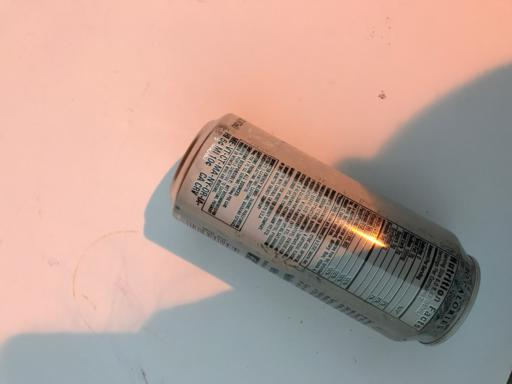

REUSED


In [22]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the model
# model = load_model('/path/to/your/model.h5')  # Replace with the actual path to your trained model

# Load the image from file
image_path = '/content/drive/MyDrive/Dataset/Garbage classification/Garbage classification/metal/metal101.jpg'
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))  # Adjust the size as needed
img = img / 255.0  # Normalize the pixel values

# Reshape the image to match the input shape expected by the model
img = np.reshape(img, (1, 224, 224, 3))

# Make the prediction
predictions = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Define your class labels
class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Get the class name for the predicted index
predicted_class_name = class_labels[predicted_class_index]

# Display the image along with the predicted class name
cv2_imshow(cv2.imread(image_path))

# Check if the predicted class is in the list ['cardboard', 'glass', 'metal', 'paper', 'plastic']
if predicted_class_name in ['cardboard', 'glass', 'metal', 'paper', 'plastic']:
    print('REUSED')
else:
    print('trash')


In [ ]:
/content/garbage-classification.zip

In [27]:
from tensorflow.keras.models import load_model

# Assume 'model' is your trained model
# Save the model to a file
model.save('/content/drive/MyDrive/Dataset/garbage classification/mod')

# To load the model back
# loaded_model = load_model('/path/to/save/your_model.h5')


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the model
# model = load_model('/path/to/your/model.h5')  # Replace with the actual path to your trained model

# Open a video capture object (0 corresponds to the default camera)
cap = cv2.VideoCapture(0)  # You can replace 0 with the path to a video file if you want to process a video file

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Resize the frame to match the input size expected by the model
    img = cv2.resize(frame, (224, 224))

    # Normalize the pixel values
    img = img / 255.0

    # Reshape the image to match the input shape expected by the model
    img = np.reshape(img, (1, 224, 224, 3))

    # Make the prediction
    predictions = model.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Define your class labels
    class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

    # Get the class name for the predicted index
    predicted_class_name = class_labels[predicted_class_index]

    # Display the frame along with the predicted class name
    cv2_imshow(frame)

    # Check if the predicted class is in the list ['cardboard', 'glass', 'metal', 'paper', 'plastic']
    if predicted_class_name in ['cardboard', 'glass', 'metal', 'paper', 'plastic']:
        print('REUSED')
    else:
        print('trash')

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()
